<a href="https://colab.research.google.com/github/GeraldoSilva1982/notebooks/blob/main/reconhecimento_objetos_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reconhecimento de objetos vestiário ###

O dataset pode ser encontrado aqui:https://github.com/zalandoresearch/fashion-mnist; O dataset tem 70000 itens divididos em 10 categorias.

Este notebook é objeto de estudo baseado neste notebook:https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb#scrollTo=2sKswgmaMenc

Geraldo Silva

In [1]:
#Importando libs
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [34]:
# o dataset vem junto ao tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Dividindo o dataset em dados de treino e teste
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
#Lista renomeando nomes dos obejetos
peca_vestuario= [ "camisetas","calca", "sueter", "vestidos","casacos", "sandalias","camisa", "tenis","bolsa","botas"]

4422102/4422102 [==============================] - 0s 0us/step


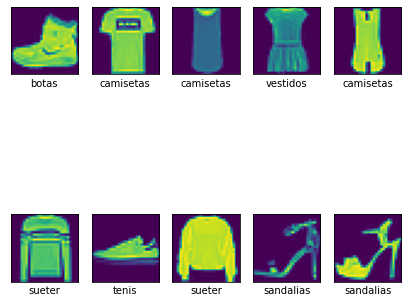

In [4]:
# Imprimindo uma imagem
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i])
  plt.xlabel(peca_vestuario[training_labels[i]])
 

In [5]:
#Será realizando a normalização dos dados para ser aplicado ao algoritmo
training_images = training_images/255
test_images = test_images/255

In [6]:
#Definido o modelo a partir da rede
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
#Construindo o modelo
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5002 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3767 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3395 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3170 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2985 - accuracy: 0.8898


In [8]:
#Avaliando o modelo com dados de teste
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8738


[0.347987562417984, 0.8737999796867371]

In [9]:
#gerando array de predições gerada pelo modelo 
predicoes = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


In [10]:
#Fazendo predições e comparando com dados de test
lista_de_comparacao =[]
contador = 0
for pred in predicoes:
  lista_de_comparacao.append(np.argmax(predicoes[contador]) == test_labels[contador])
  contador += 1

In [16]:

#Obtendo total de predições com valores true
predicoes_true=lista_de_comparacao.count(True)

int

In [25]:
#Obtendo total de predições com valores false
predicoes_false=lista_de_comparacao.count(False)

<function matplotlib.pyplot.show(*args, **kw)>

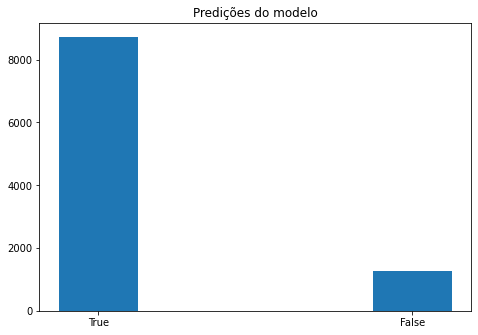

In [33]:
#Plotando em gráfico as predições
fig =plt.figure()
ax = fig.add_axes([0,0,1,1])
lista_true_false=['True','False']
lista_contagem_valores_true_false=[predicoes_true.real,predicoes_false.real]
ax.set_title('Predições do modelo')
ax.bar(lista_true_false,lista_contagem_valores_true_false,width=0.25)
plt.show
#ax.bar(predicoes_false, 10000)

Será realizando estudos futuros para melhorar taxa de acerto do modelo.
